In [91]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.base import AnalysisFromFunction
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
from MDAnalysis.analysis.rms import RMSD
import os


In [100]:
u = mda.Universe("centered.gro")
sds_atoms = u.select_atoms("resname SDS")
atoms = u.select_atoms("name OS1")

In [101]:
atoms.center_of_mass()

array([31.22383371, 32.7723338 , 29.20916659])

In [102]:
atom_positions = atoms.positions
atom_coordinates = np.array(atom_positions, dtype=np.float64)
atom_coordinates

array([[31.77000046, 11.84999943, 25.13999939],
       [-0.48999998, 60.37000275, 21.25      ],
       [24.89999962, 37.29000092, 25.90999985],
       [ 2.79999995, 61.52999878,  5.55999994],
       [ 8.17000008, 47.02000046, 25.05000114],
       [ 3.63000011, 40.79999924, 16.36000061],
       [26.80000114, 33.04000092, 47.43000031],
       [43.59000397, 16.73999977, 41.93000031],
       [40.13000107, 34.08000183, 42.97999954],
       [16.22999954, 24.60000038, 38.36999893],
       [ 8.10000038, 49.31000137,  8.34000015],
       [48.25      , 31.73999977, 23.6400013 ],
       [16.59000015, 27.29999924, 44.25      ],
       [ 3.65999985, 67.75      , 12.43999958],
       [27.11999893, 13.42000008, 21.52000046],
       [13.90999985, 13.22000027, 55.22999573],
       [25.48000145, 33.04000092, 41.56999969],
       [ 7.76000023, 62.75      , 19.5       ],
       [40.02999878, 32.57999802, 48.02000046],
       [30.35000038, 10.81999969, 41.79000092],
       [49.91000366, 25.62000084, 27.739

## Data Clustering

In [112]:
k_means = KMeans(n_clusters = 3, init = "k-means++", n_init = 10, random_state = 0)
y = k_means.fit_predict(atom_coordinates)
atom_centroids = k_means.cluster_centers_
atom_centroids

array([[32.06780531, 23.81902466, 35.65707295],
       [ 8.63750009, 52.26000055, 14.97250028],
       [65.00000054, 51.80571583, 15.84857157]])

In [113]:
k_means = KMeans(n_clusters = 3, init = "k-means++", n_init = 10, random_state = 0)
y = k_means.fit_predict(atom_coordinates)
atom_centroids = k_means.cluster_centers_
atom_centroids

array([[32.06780531, 23.81902466, 35.65707295],
       [ 8.63750009, 52.26000055, 14.97250028],
       [65.00000054, 51.80571583, 15.84857157]])

In [114]:
coordinates = []
for atom in sds_atoms:
    coordinates.append([atom.position[0],atom.position[1], atom.position[2]])
coordinates = np.array(coordinates, dtype=np.float64)
coordinates

array([[31.21000099, 10.93000031, 24.05999947],
       [31.77000046, 11.84999943, 25.13999939],
       [29.79999924, 10.84000015, 24.06999969],
       ...,
       [ 4.26999998, 58.04999924, 18.27000046],
       [ 5.38000011, 58.34000015, 19.62000084],
       [ 3.54999995, 58.89999771, 19.70000076]])

In [115]:
x_c = coordinates[:,0]
y_c = coordinates[:,1]
z_c = coordinates[:,2]

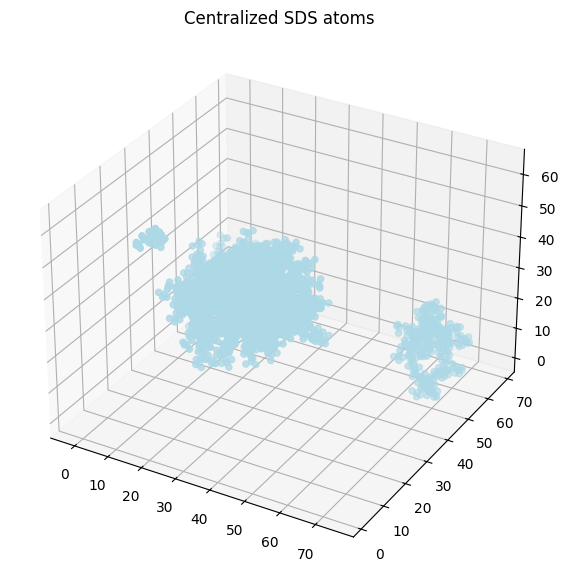

In [116]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d') 

ax.scatter3D(x_c, y_c, z_c, color="lightblue")
plt.title("Centralized SDS atoms")
plt.show()

In [117]:
k_means = KMeans(n_clusters = 3, init = "k-means++", n_init = 10, random_state = 0)
y = k_means.fit_predict(coordinates)
centroids = k_means.cluster_centers_
centroids

array([[ 6.68961537, 53.00760681, 13.79749999],
       [67.6483675 , 52.70625871, 13.37792521],
       [31.95613769, 23.77756538, 35.96319104]])

In [118]:
sds_atoms_position = sds_atoms.positions
sds_atoms_position

array([[31.210001, 10.93    , 24.06    ],
       [31.77    , 11.849999, 25.14    ],
       [29.8     , 10.84    , 24.07    ],
       ...,
       [ 4.27    , 58.05    , 18.27    ],
       [ 5.38    , 58.34    , 19.62    ],
       [ 3.55    , 58.899998, 19.7     ]], dtype=float32)

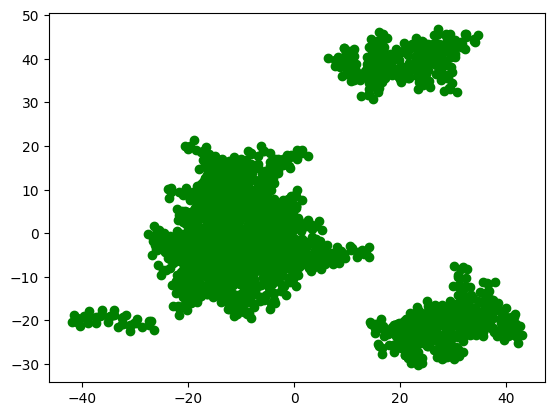

In [120]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(sds_atoms_position)
plt.scatter(data_2d[:,0], data_2d[:, 1], color="green")
plt.show()

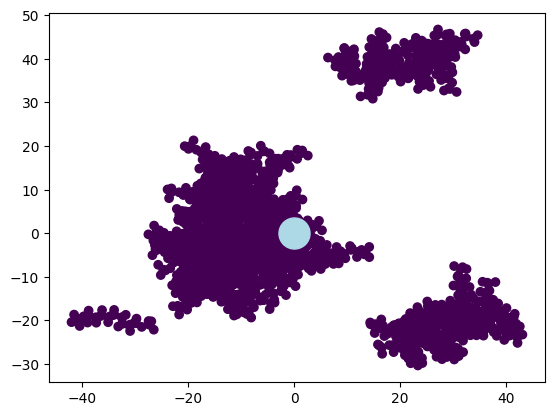

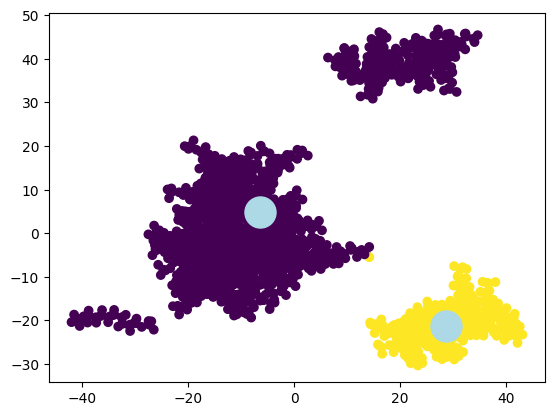

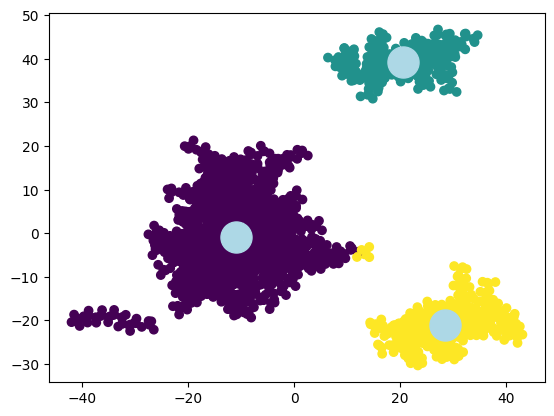

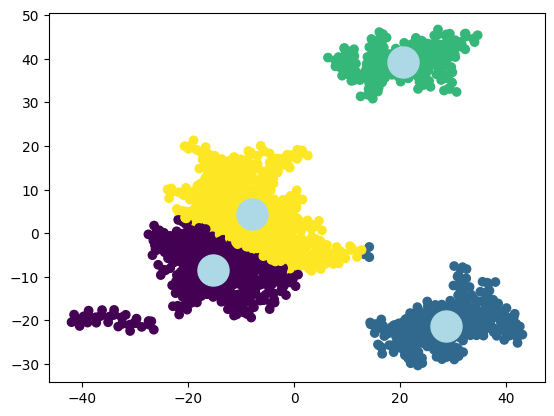

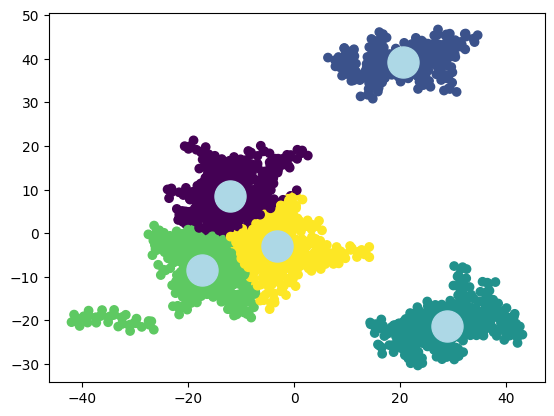

In [121]:
wcss = []
for i in range(1, 6):
    k_means = KMeans(n_clusters=i, init= "k-means++", n_init = 10, random_state=0)
    k_means.fit(data_2d)
    y_pred = k_means.predict(data_2d)
    centroids = k_means.cluster_centers_
    wcss_i = k_means.inertia_
    wcss.append(wcss_i)
    plt.scatter(data_2d[:,0],data_2d[:,1], c = y_pred)
    plt.scatter(centroids[:,0],centroids[:,1], s = 500, c = 'lightblue')
    plt.show()

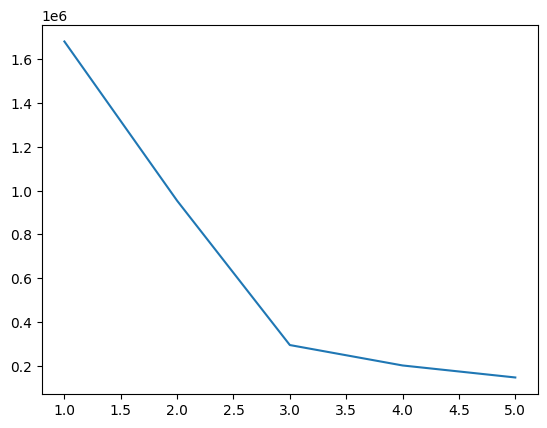

In [122]:
plt.plot(range(1,6),wcss)
plt.show()

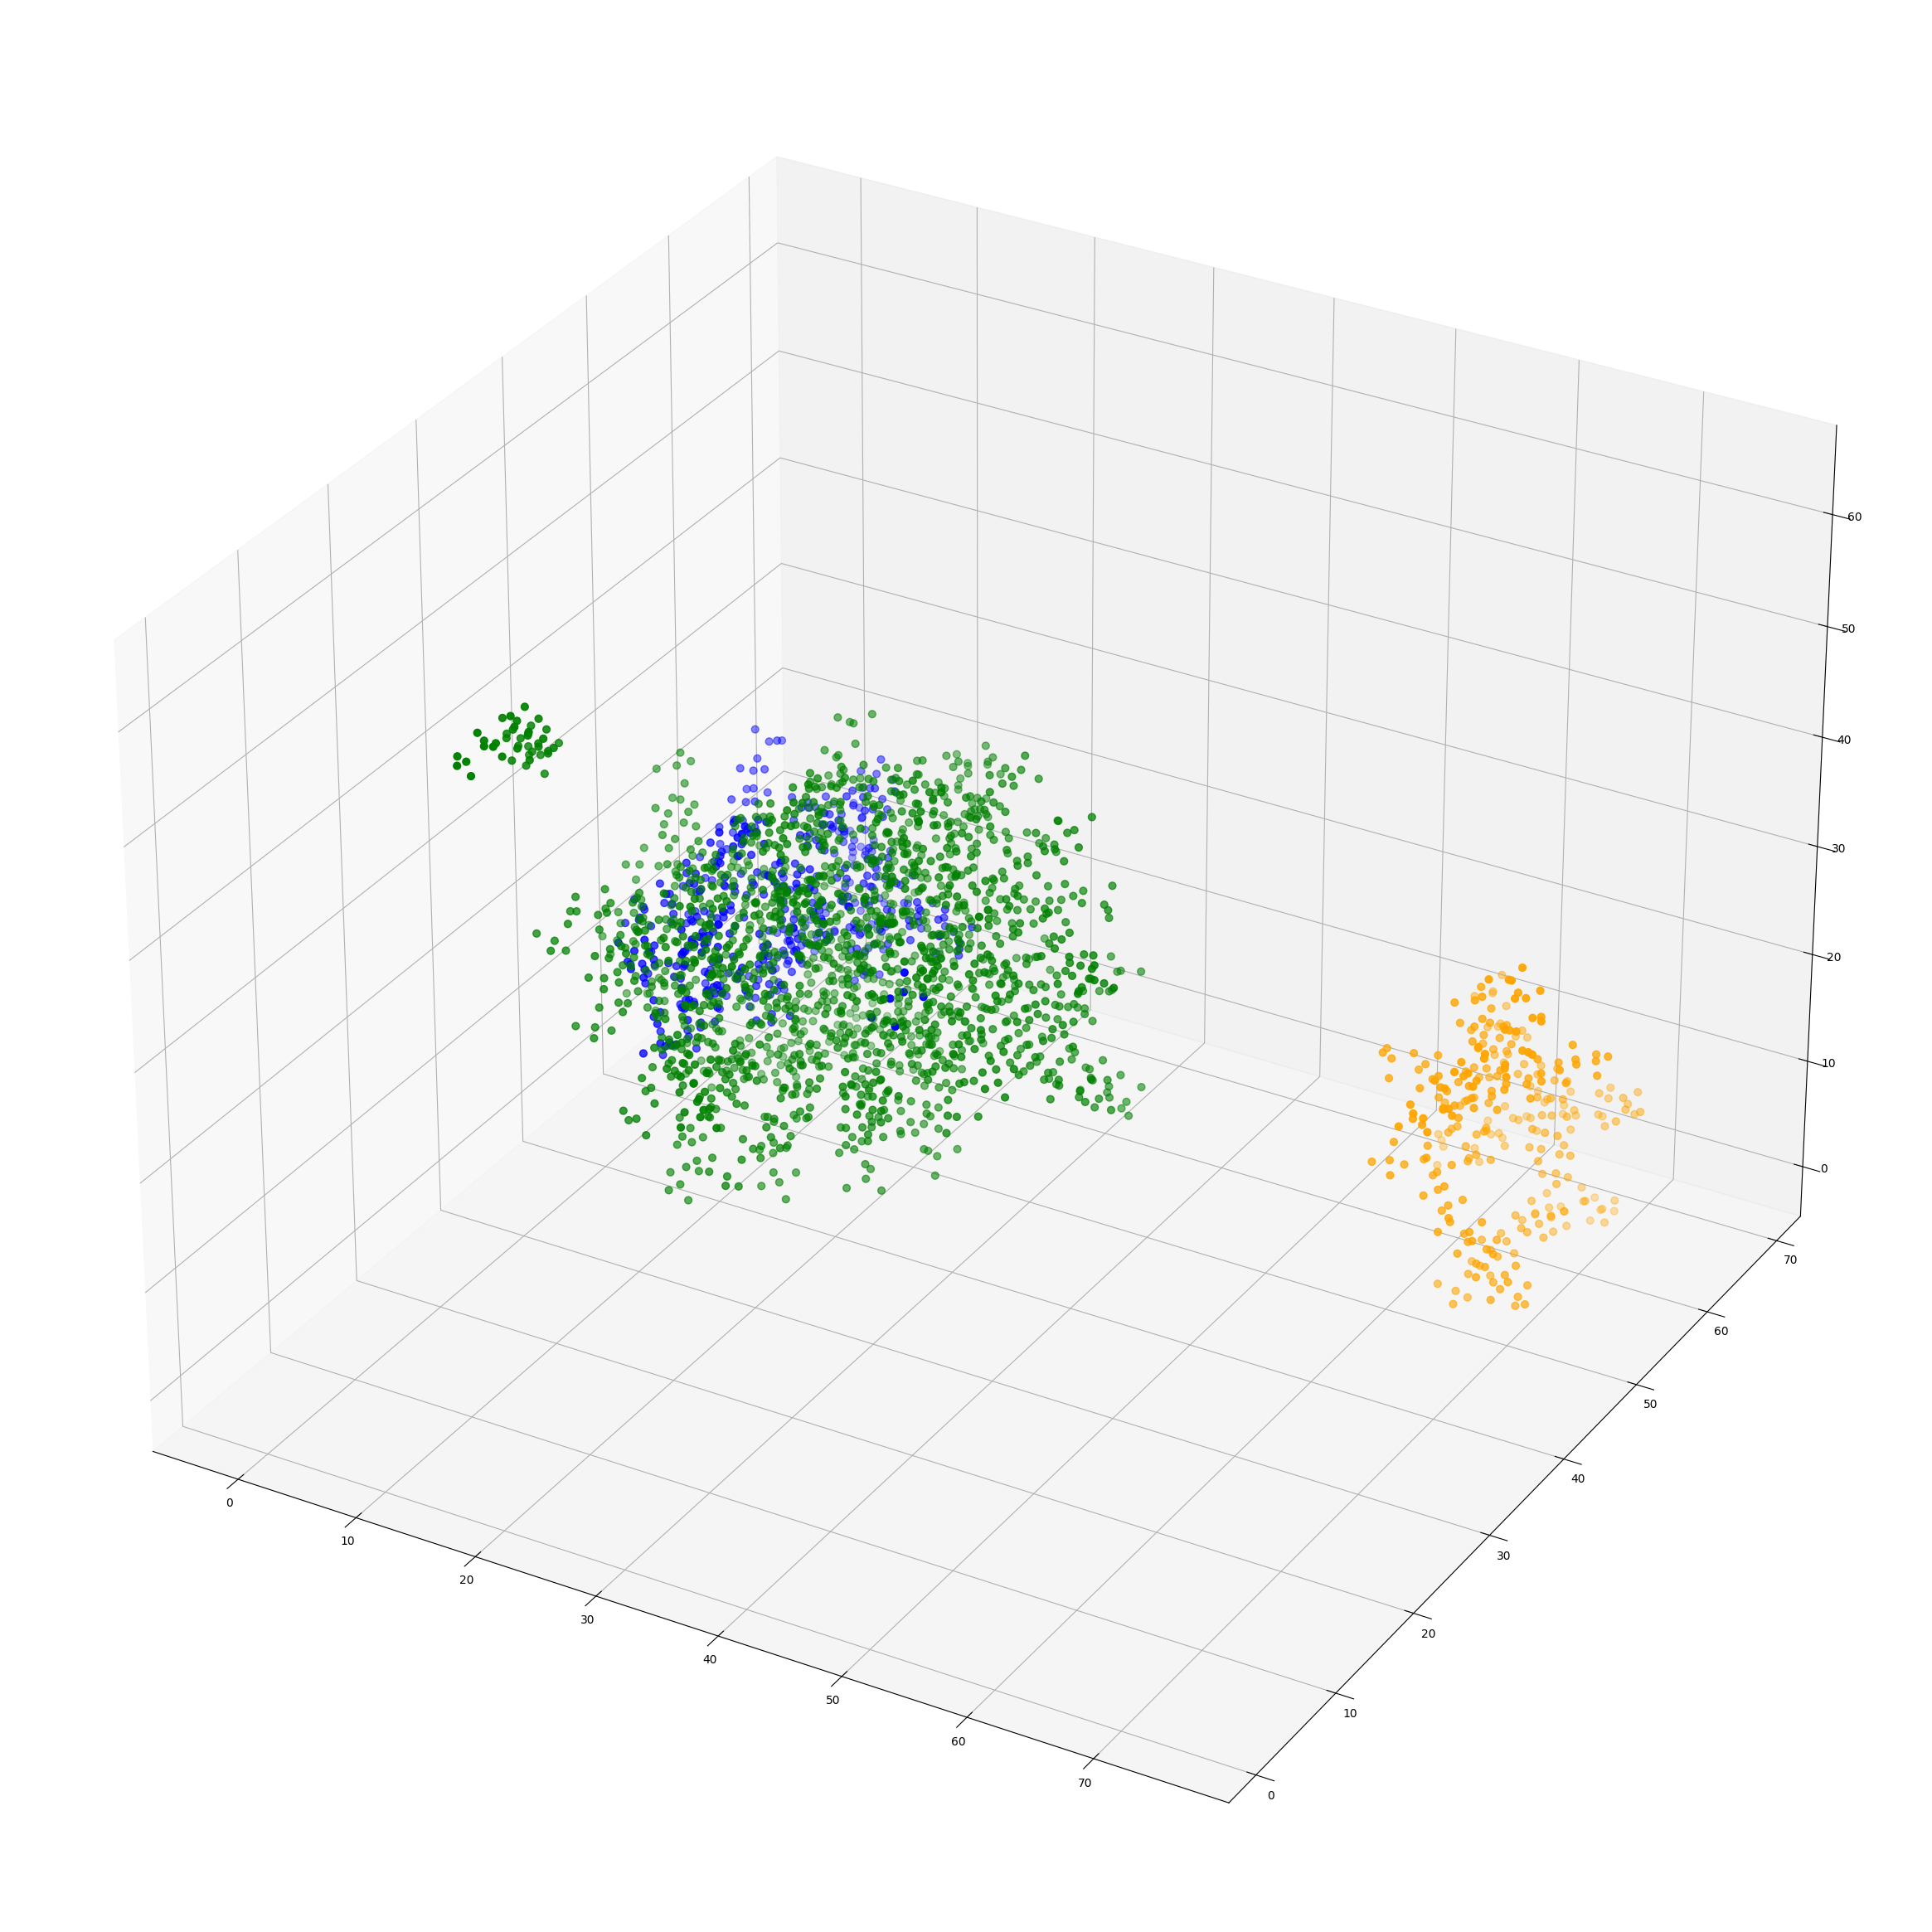

In [109]:
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111, projection='3d')
centroids = k_means.cluster_centers_

ax.scatter(coordinates[y == 0,0],coordinates[y == 0,1],coordinates[y == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(coordinates[y == 1,0],coordinates[y == 1,1],coordinates[y == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(coordinates[y == 2,0],coordinates[y == 2,1],coordinates[y == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(coordinates[y == 3,0],coordinates[y == 3,1],coordinates[y == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")

plt.show()

In [123]:

k_means = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=0)
y = k_means.fit_predict(coordinates)
centroids = k_means.cluster_centers_

cluster_radius = []
for i in range(len(centroids)):
    cluster_points = coordinates[y == i]
    max_distance = 0
    for point in cluster_points:
        dist = distance.euclidean(point, centroids[i])
        if dist > max_distance:
            max_distance = dist
    cluster_radius.append(max_distance)

print("Cluster Radius:", cluster_radius)


Cluster Radius: [24.168616792695698, 17.659996505861393, 37.09896372891096]


In [124]:
k_means = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=0)
cluster_labels = k_means.fit_predict(coordinates)


cluster_data = {i: [] for i in range(len(set(cluster_labels)))}

for label, data_point in zip(cluster_labels, coordinates):
    cluster_data[label].append(data_point)
    

In [126]:
coordinates = []
for atom in sds_atoms:
    coordinates.append([atom.position[0],atom.position[1], atom.position[2]])
coordinates = np.array(coordinates, dtype=np.float64)
coordinates

array([[31.21000099, 10.93000031, 24.05999947],
       [31.77000046, 11.84999943, 25.13999939],
       [29.79999924, 10.84000015, 24.06999969],
       ...,
       [ 4.26999998, 58.04999924, 18.27000046],
       [ 5.38000011, 58.34000015, 19.62000084],
       [ 3.54999995, 58.89999771, 19.70000076]])

In [132]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=0)
kmeans.fit(sds_atoms_position)
label = kmeans.predict(sds_atoms_position)
count= 0
for i in label:
    if i == 0:
        count += 1
print(count)

468


In [133]:
index = np.argwhere(label == 0)
cluster = sds_atoms[index].resids
cluster

array([[ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],

In [135]:
centered_micelle = []
centered_info = []
for atom in cluster:
    centered_micelle.append(sds_atoms_position[atom])
    centered_info.append(sds_atoms[atom])
centered_micelle = np.vstack(centered_micelle)
centered = np.vstack(centered_info)
np.set_printoptions(precision=8, suppress=True)
centered_micelle

array([[29.8       , 10.84      , 24.07      ],
       [29.8       , 10.84      , 24.07      ],
       [29.8       , 10.84      , 24.07      ],
       ...,
       [-0.08000001, 54.899998  , 18.2       ],
       [-0.08000001, 54.899998  , 18.2       ],
       [-0.08000001, 54.899998  , 18.2       ]], dtype=float32)

In [137]:
for_gro = zip(centered, centered_micelle)
with open("new.gro", "a") as f:
    for element in for_gro:
        f.write(str(element) + "\n")
    f.flush()
     

In [138]:
with open("new.gro", "r") as f:
    print(f.read())

(array([<Atom 2: OS1 of type O of resname SDS, resid 1 and segid SYSTEM>],
      dtype=object), array([31.77    , 11.849999, 25.14    ], dtype=float32))
(array([<Atom 2: OS1 of type O of resname SDS, resid 1 and segid SYSTEM>],
      dtype=object), array([31.77    , 11.849999, 25.14    ], dtype=float32))
(array([<Atom 2: OS1 of type O of resname SDS, resid 1 and segid SYSTEM>],
      dtype=object), array([31.77    , 11.849999, 25.14    ], dtype=float32))
(array([<Atom 2: OS1 of type O of resname SDS, resid 1 and segid SYSTEM>],
      dtype=object), array([31.77    , 11.849999, 25.14    ], dtype=float32))
(array([<Atom 2: OS1 of type O of resname SDS, resid 1 and segid SYSTEM>],
      dtype=object), array([31.77    , 11.849999, 25.14    ], dtype=float32))
(array([<Atom 2: OS1 of type O of resname SDS, resid 1 and segid SYSTEM>],
      dtype=object), array([31.77    , 11.849999, 25.14    ], dtype=float32))
(array([<Atom 2: OS1 of type O of resname SDS, resid 1 and segid SYSTEM>],
      d

In [139]:
x, y, z, a = [], [], [], []
with open("principal.xvg") as f:
    for line in f:
        cols = line.split()
        x.append(float(cols[1]))
        y.append(float(cols[2]))
        z.append(float(cols[3]))
        a.append(float(cols[0]))



In [140]:
x = np.array(x)
y = np.array(y)
z = np.array(z)

In [141]:
principlas = np.array([x,y,z]).T
principlas

array([[4384.70703125, 5677.52148438, 6311.30566406],
       [4384.84716797, 4551.6875    , 6823.87402344],
       [2808.75146484, 3746.55493164, 4746.94238281],
       [2522.0559082 , 4542.57568359, 5796.90820312],
       [3878.09619141, 5934.75097656, 6699.08447266],
       [3073.35083008, 6356.60302734, 7335.63330078],
       [4156.89257812, 6432.65869141, 8210.22070312],
       [3847.26489258, 7591.25195312, 8171.60351562],
       [4654.25830078, 5213.67871094, 6652.73339844],
       [3738.38378906, 4172.60205078, 5958.26416016],
       [4635.3359375 , 5635.24755859, 6288.39746094],
       [4972.00439453, 5095.09082031, 6360.91015625],
       [4010.17993164, 4823.0234375 , 6618.90966797],
       [3468.19799805, 4715.47900391, 5964.72753906],
       [3437.19140625, 6063.55419922, 7733.49462891],
       [3299.49438477, 5084.61376953, 5697.95458984],
       [3381.28857422, 3907.17797852, 5295.21289062],
       [3547.87451172, 5641.70947266, 6669.04638672],
       [3003.39404297, 4038.

In [ ]:
ellipsoid = []
for i in principlas:
    ellipsoid.append(max(i) / min(i))
    
# ellipsoid

plt.plot(ellipsoid)

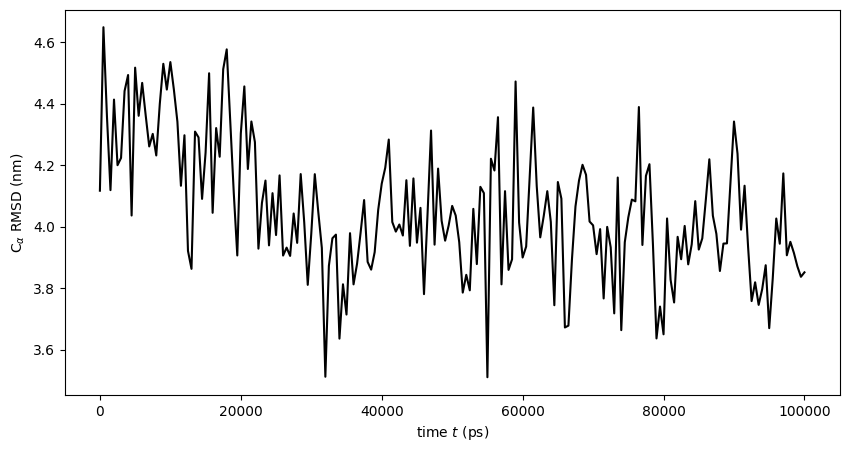

In [127]:
# Importing the necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Loading data from the rmsd.xvg file, ignoring lines starting with "@" or "#"
t,rmsd = np.loadtxt("rmsd_micelle.xvg", comments=["@", "#"], unpack=True)
# t_xtal,rmsd_xtal = np.loadtxt("rmsd_xtal.xvg", comments=["@", "#"], unpack=True)

# Creating a figure and axis objects for the plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# Filling the area between the x-values (res) and y-values (rmsf) with a semi-transparent black color
# ax.fill_between(t_xtal,rmsd_xtal, color="red", linestyle="-", alpha=0.3)
# ax.fill_between(t,rmsd, color="black", linestyle="-", alpha=0.3)


# Plotting the line representing the RMSF values
ax.plot(t,rmsd, color="black", linestyle="-")
# ax.plot(t_xtal,rmsd_xtal, color="red", linestyle="-")

# Setting labels for the x-axis (time in ps) and y-axis (RMSD value)
ax.set_xlabel("time $t$ (ps)")
ax.set_ylabel(r"C$_\alpha$ RMSD (nm)")

# Saving the plot as a PNG image with higher resolution (300 dpi)
plt.savefig("rmsd.png", format="png", dpi=300)

# Displaying the plot
plt.show()


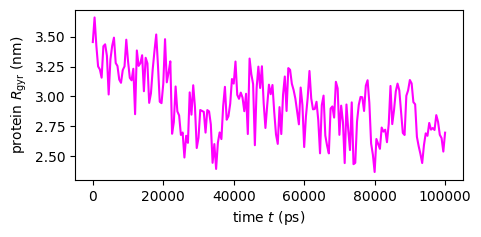

In [128]:
import matplotlib.pyplot as plt
import numpy

t,data,x,y,z = numpy.loadtxt("gyrate.xvg",comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)

# ax.fill_between(t,data, color="magenta", linestyle="-", alpha=0.1)
ax.plot(t,data, color="magenta", linestyle="-")

ax.set_xlabel("time $t$ (ps)")
ax.set_ylabel(r"protein $R_\mathrm{gyr}$ (nm)")

fig.savefig("rgyr.png", dpi=300)
fig.savefig("rgyr.svg")
fig.savefig("rgyr.pdf")

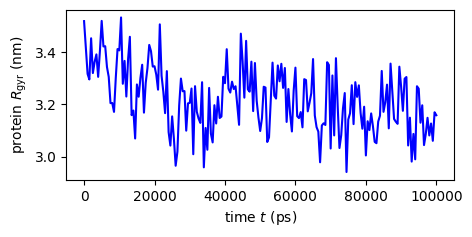

In [13]:
import matplotlib.pyplot as plt
import numpy

t,data,x,y,z = numpy.loadtxt("gyrate_pot.xvg",comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)

ax.plot(t,data, color="blue", linestyle="-")

ax.set_xlabel("time $t$ (ps)")
ax.set_ylabel(r"protein $R_\mathrm{gyr}$ (nm)")

fig.savefig("rgyr.png", dpi=300)
fig.savefig("rgyr.svg")
fig.savefig("rgyr.pdf")

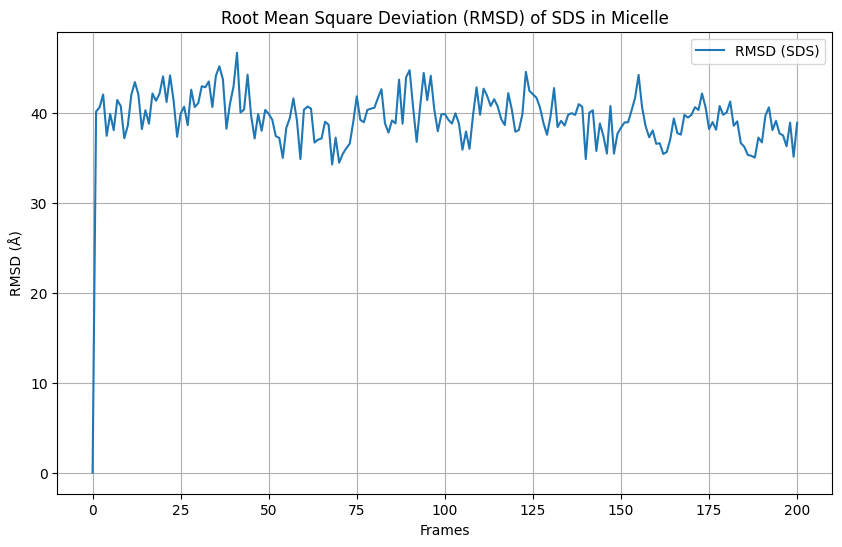

In [15]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
import matplotlib.pyplot as plt

gro_file = 'centered.gro'
xtc_file = 'centered.xtc'
u = mda.Universe(gro_file, xtc_file)

selection = "resname SDS"
rmsd_analysis = RMSD(u, select=selection)
rmsd_analysis.run()
time = rmsd_analysis.rmsd[:, 0]
rmsd_values = rmsd_analysis.rmsd[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(time, rmsd_values, label='RMSD (SDS)')
plt.xlabel('Frames')
plt.ylabel('RMSD (Å)')
plt.title('Root Mean Square Deviation (RMSD) of SDS in Micelle')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
rmsd_std = np.std(rmsd_values)
gyr_std = np.std(s.gyr_data.timeseries[:, 0])

print("RMSD standard deviation:", rmsd_std)
print("Radius of gyration standard deviation:", gyr_std)


RMSD standard deviation: 3.676260913175761
Radius of gyration standard deviation: 2.6547673670584775
